In [1]:
import os

texts = {}

for writer in sorted(os.listdir('./books')):
    textNames = sorted(os.listdir('./books/' + writer))
    texts.update({writer: textNames})

writers = list(texts.keys())

print(writers)

['Аркадий Гайдар', 'Жюль Верн', 'Лев Толстой', 'Фазиль Искандер', 'Федор Достоевский']


In [2]:
print(texts)

{'Аркадий Гайдар': ['Судьба барабанщика.txt', 'Тимур и его команда.txt', 'Школа.txt'], 'Жюль Верн': ['Двадцать тысяч лье под водой.txt', 'Путешествие к центру Земли.txt', 'Таинственный остров.txt'], 'Лев Толстой': ['Анна Каренина.txt', 'Крейцерова соната.txt', 'Хаджи-Мурат.txt'], 'Фазиль Искандер': ['Морской скорпион.txt', 'Поэт.txt', 'Стоянка человека.txt'], 'Федор Достоевский': ['Белые ночи.txt', 'Игрок.txt', 'Преступление и наказание.txt']}


In [3]:
import itertools
def grouper(n, iterable):
    args = [iter(iterable)] * n
    #return list(map(lambda s: "".join(s), list([e for e in t if e != None] for t in itertools.zip_longest(*args))))
    return list("".join([e for e in t if e != None]) for t in itertools.zip_longest(*args))

In [4]:
data = []
label_list = []
for writer in writers:
    books = []
    for text in texts[writer]:
        with open('./books/' + writer + '/' + text) as bookFile:
            book = bookFile.read().replace('\n', ' ').replace('\xa0', ' ')
            for b in grouper(100000, book):
                books.append(b)
                label_list.append(writer + '_' + text[:-4])
    data.append(books)

In [5]:
import spacy
nlp = spacy.load('/home/ocaml/spacy-ru-master/ru2/')

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ocaml/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from nltk.tokenize import sent_tokenize

In [10]:
sent_tokenize_list = sent_tokenize(data[0][0])

In [11]:
data[0][0] # первые 100_000 слов первой книги первого автора

' \x14Аркадий Гайдар. Судьба барабанщика\x15     ---------------------------------------------------------------------  Книга: А.Гайдар. Собрание сочинений в трех томах. Том 2  Издательство "Правда", Москва, 1986  OCR & SpellCheck: Zmiy (zpdd@chat.ru), 13 декабря 2001  ---------------------------------------------------------------------    Когда-то мой отец воевал с белыми, был ранен, бежал из плена, потом по должности командира саперной роты ушел в запас. Мать моя утонула, купаясь на реке Волге, когда мне было восемь лет. От большого горя мы переехали в Москву. И здесь через два года отец женился на красивой девушке Валентине Долгунцовой. Люди говорят, что сначала жили мы скромно и тихо. Небогатую квартиру нашу держала Валентина в чистоте. Одевалась просто. Об отце заботилась и меня не обижала.  Но тут окончились распределители, разные талоны, хлебные карточки. Стал народ жить получше, побогаче. Стала чаще и чаще ходить Валентина в кино, то одна, то с провожатыми. Домой возвращалась 

In [13]:
sent_tokenize_list = sent_tokenize(data[0][0])
for sent_index, sent in enumerate(sent_tokenize_list[:10]):
    print("#{}:{}".format(sent_index, sent))

#0: Аркадий Гайдар.
#1:Судьба барабанщика     ---------------------------------------------------------------------  Книга: А.Гайдар.
#2:Собрание сочинений в трех томах.
#3:Том 2  Издательство "Правда", Москва, 1986  OCR & SpellCheck: Zmiy (zpdd@chat.ru), 13 декабря 2001  ---------------------------------------------------------------------    Когда-то мой отец воевал с белыми, был ранен, бежал из плена, потом по должности командира саперной роты ушел в запас.
#4:Мать моя утонула, купаясь на реке Волге, когда мне было восемь лет.
#5:От большого горя мы переехали в Москву.
#6:И здесь через два года отец женился на красивой девушке Валентине Долгунцовой.
#7:Люди говорят, что сначала жили мы скромно и тихо.
#8:Небогатую квартиру нашу держала Валентина в чистоте.
#9:Одевалась просто.


In [14]:
# парсим по одному предложению и по каждому выводим его структуру
def parse_one_sentence(one_sentence):
    doc = nlp(one_sentence)
    for token in doc:
        print('{} \ {} \ {} \ {} \ {} \ {}'.format(
            token.text, 
            token.lemma_,
            token.pos_, 
            token.tag_, 
            token.dep_, 
            token.head.text
        ))

for sent_index, sent in enumerate(sent_tokenize_list[:5]):
    print("Sentence #{}\t{}".format(sent_index,sent))
    parse_one_sentence(sent)
    print('\n\n')

Sentence #0	 Аркадий Гайдар.
  \   \ SPACE \  \  \ Аркадий
Аркадий \ аркадий \ VERB \ VERB__Aspect=Imp|Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Mid \ ROOT \ Аркадий
Гайдар \ гайдар \ PROPN \ PROPN__Animacy=Anim|Case=Gen|Gender=Masc|Number=Plur \ nsubj \ Аркадий
. \ . \ PUNCT \ PUNCT___ \ punct \ Аркадий



Sentence #1	Судьба барабанщика     ---------------------------------------------------------------------  Книга: А.Гайдар.
Судьба \ судьба \ NOUN \ NOUN__Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing \ nsubj \ ---------------------------------------------------------------------
барабанщика \ барабанщика \ PROPN \ PROPN__Animacy=Anim|Case=Gen|Gender=Masc|Number=Sing \ appos \ Судьба
     \      \ SPACE \ _SP \  \ барабанщика
--------------------------------------------------------------------- \ --------------------------------------------------------------------- \ PUNCT \ PUNCT___ \ ROOT \ ----------------------------------------------------------------

In [16]:
from nltk import Tree

# используем одно из предложений
doc = nlp(sent_tokenize_list[43])
print(doc)

# построим для него семантическое дерево
def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_

to_nltk_tree(list(doc.sents)[0].root).pretty_print()

Через потертую ткань слабо, как звездочки, мерцали желтые искры света.
                                   слабо                               
         ____________________________|__________                        
        |                    |               мерцали                   
        |                    |             _____|_____________          
      ткань              звездочки        |     |           искры      
   _____|______        ______|_______     |     |       ______|_____    
Через       потертую  ,             как   ,     .    желтые       света



In [17]:
# функция для получения атрибутов, характеризующих авторский стиль (число слов в предложении, 
# число потомков корня, глубина семантического дерева)
def attr(doc):
    out = {'sentSize': len(doc)} # число слов в предложении
    for word in doc:
        if word.dep_ =='ROOT': out.update({'rootChild': len(list(word.children))}) # число потомков корня

    import json
    # глубина семантического дерева
    def depth(jsn):
        if 'modifiers' in jsn.keys():
            return 1 +  max([0] + list(map(depth, jsn['modifiers'])))
        else:
            return 1

    j = json.loads(str(doc.print_tree()[0]).replace('\'', "\""))
    out.update({'depthTree': depth(j)}) 
    return out

In [18]:
attr(doc)

{'sentSize': 13, 'rootChild': 3, 'depthTree': 4}

In [19]:
# вычисление числа встречающихся в тексте различных трилетов
# используются топ-10 из наиболее встречаемых трилетов
from itertools import combinations

def treelets(data, topN=10):
    import operator
    from collections import OrderedDict
    from operator import itemgetter
    
    def trSort(tr):
        return dict((sorted(tr.items(), key=itemgetter(1)))[-topN:])
    
    one_gram_treelet = {}
    two_gram_treelet = {}
    three_gram_treelet = {}
    for sent in sent_tokenize(data):
        doc = nlp(sent)

        for token in doc:
            key = token.pos_
            one_gram_treelet.update({key: one_gram_treelet.get(key, 0) + 1})

            key = (token.head.pos_, token.dep_, token.pos_)
            two_gram_treelet.update({key: two_gram_treelet.get(key, 0) + 1})

            for (left_child, right_child) in combinations(token.children, 2):
                if left_child.dep_ != 'punct' and right_child.dep_ != 'punct':
                    key = (1, left_child.pos_, left_child.dep_, token.pos_, right_child.dep_, right_child.pos_)
                    three_gram_treelet.update({key: three_gram_treelet.get(key, 0) + 1})
            if token.dep_ != 'ROOT':
                for child in token.children:
                    if child.dep_ == 'punct' or token.dep_ == 'punct':
                        continue
                    key = (2, child.pos_, child.dep_, token.pos_, token.dep_, token.head.pos_)
                    three_gram_treelet.update({key: three_gram_treelet.get(key, 0) + 1})
                    
    return (len(sent_tokenize(data)), trSort(one_gram_treelet), trSort(two_gram_treelet), trSort(three_gram_treelet))

In [20]:
(numOfSents, sorted_1gram_treelet, sorted_2gram_treelet, sorted_3gram_treelet) = treelets(data[0][0])
print(numOfSents)
print(sorted_1gram_treelet)

1712
{'SCONJ': 424, 'PART': 966, 'CCONJ': 1046, 'ADV': 1297, 'ADJ': 1379, 'ADP': 1542, 'PRON': 1919, 'VERB': 2928, 'NOUN': 3485, 'PUNCT': 5066}


In [22]:
print(sorted_2gram_treelet)
print(list(sorted_2gram_treelet.keys()))

{('VERB', 'cc', 'CCONJ'): 629, ('VERB', 'conj', 'VERB'): 665, ('VERB', 'advmod', 'ADV'): 725, ('NOUN', 'amod', 'ADJ'): 725, ('VERB', 'nsubj', 'PRON'): 885, ('VERB', 'obl', 'NOUN'): 1014, ('NOUN', 'punct', 'PUNCT'): 1020, ('NOUN', 'case', 'ADP'): 1140, ('VERB', 'ROOT', 'VERB'): 1176, ('VERB', 'punct', 'PUNCT'): 2565}
[('VERB', 'cc', 'CCONJ'), ('VERB', 'conj', 'VERB'), ('VERB', 'advmod', 'ADV'), ('NOUN', 'amod', 'ADJ'), ('VERB', 'nsubj', 'PRON'), ('VERB', 'obl', 'NOUN'), ('NOUN', 'punct', 'PUNCT'), ('NOUN', 'case', 'ADP'), ('VERB', 'ROOT', 'VERB'), ('VERB', 'punct', 'PUNCT')]


In [26]:
print(sorted_3gram_treelet)

{(1, 'CCONJ', 'cc', 'VERB', 'advmod', 'ADV'): 203, (1, 'ADP', 'case', 'NOUN', 'amod', 'ADJ'): 230, (1, 'CCONJ', 'cc', 'VERB', 'obl', 'NOUN'): 239, (2, 'NOUN', 'obl', 'VERB', 'conj', 'VERB'): 243, (1, 'NOUN', 'obl', 'VERB', 'conj', 'VERB'): 245, (1, 'PRON', 'nsubj', 'VERB', 'obl', 'NOUN'): 258, (1, 'VERB', 'conj', 'VERB', 'conj', 'VERB'): 259, (1, 'PRON', 'nsubj', 'VERB', 'conj', 'VERB'): 298, (2, 'CCONJ', 'cc', 'VERB', 'conj', 'VERB'): 387, (2, 'ADP', 'case', 'NOUN', 'obl', 'VERB'): 791}


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def sintAnalyze(X):
    # Выбор оптимального числа классов
    sse = {}
    for k in range(1, 20):
        kmeans = KMeans(n_clusters=k).fit(X)
        sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
        
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of clusters")
    plt.ylabel("SSE")
    plt.show()
    
    kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
    
    # Доля соответствия номера автора номеру кластера
    
    matches = []
    for Nclust in range(5):
        clustMatches = []
        for Nauth in range(5):
            authMatches = 0
            for i in kmeans.predict(np.array(trAuth[Nauth])):
                if i == Nclust: authMatches += 1
            clustMatches.append(authMatches/len(trAuth[Nauth]))
        matches.append(clustMatches)
        
    # дробные числа - доля соответствия номера кластера номеру автора, 
    # столбец справа - номер столбца с максимальным значением 
    # (соответствует номеру автора, наиболее часто попадающего в данный кластер, 
    # номера строк - номера кластеров, столбцов - авторов)
    for line in matches:
        for item in line:
            print("{:f}".format(item), end=' ')
        print(np.argmax(line), end='')
        print()

In [28]:
import pickle
import os.path
# получение трилетов
if not os.path.exists('dataTr.pickle'):
    trByAuth = []
    for authorTexts in data:
        trByText = []
        for text in authorTexts:
            trByText.append(treelets(text))
        trByAuth.append(trByText)
    # сохранение полученных атрибутов для дальнейшего использования
    with open('dataTr.pickle', 'wb') as f:
        pickle.dump(trByAuth, f)
else:
    # если анализ по трилетам уже проводился, загрузить сохраненные данные
    with open('dataTr.pickle', 'rb') as f:
        trByAuth = pickle.load(f)

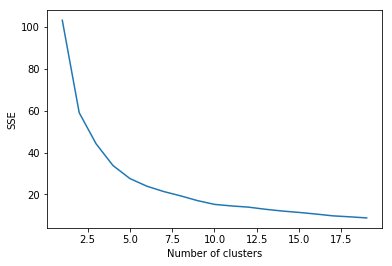

0.875000 0.080000 0.100000 0.250000 0.062500 0
0.000000 0.440000 0.200000 0.083333 0.062500 1
0.000000 0.000000 0.600000 0.000000 0.812500 4
0.000000 0.000000 0.000000 0.333333 0.062500 3
0.125000 0.480000 0.100000 0.333333 0.000000 1


In [29]:
# анализ текстов по трилетам
trAuth = []
for auth in trByAuth:
    trText = []
    for text in auth:
        numOfSent = text[0]
        numOfTreelets = list(map(lambda x: x/numOfSent, list(text[1].values()) + list(text[2].values()) + list(text[3].values())))
        trText.append(numOfTreelets)
    trAuth.append(trText)
    
# K-Means кластеризация
from sklearn.cluster import KMeans
Xtr = trAuth[0] + trAuth[1] + trAuth[2] + trAuth[3] + trAuth[4]

sintAnalyze(Xtr)

In [30]:
# получение атрибутов дерева
if not os.path.exists('data.pickle'):
    attrsByAuth = []
    for authorTexts in data:
        attrsByText = []
        for text in authorTexts:
            sents = sent_tokenize(text)
            attrBySent = []
            for sent in sents:
                doc = nlp(sent)
                try:
                    attrBySent.append(attr(doc))
                except:
                    pass
            attrsByText.append(attrBySent)
        attrsByAuth.append(attrsByText)
        # Сохранение полученных атрибутов для дальнейшего использования
        with open('data.pickle', 'wb') as f:
            pickle.dump(attrsByAuth, f)
else:
    # если анализ по атрибутам дерева уже проводился, загрузить сохраненные данные
    with open('data.pickle', 'rb') as f:
        attrsByAuth = pickle.load(f)

EOFError: Ran out of input